In [87]:
import json
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Loading datasets

In [2]:
# load and preview the data
def json_to_df(path):
    data = []
    with open(path) as f:
        for line in f:
            data.append(json.loads(line))
    return pd.DataFrame.from_dict(data)

In [3]:
business_df = json_to_df('yelp_dataset/yelp_academic_dataset_business.json')
review_df = json_to_df('yelp_dataset/yelp_academic_dataset_review.json')
user_df = json_to_df('yelp_dataset/yelp_academic_dataset_user.json')
checkin_df = json_to_df('yelp_dataset/yelp_academic_dataset_checkin.json')
tip_df = json_to_df('yelp_dataset/yelp_academic_dataset_tip.json')

In [4]:
business_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB


In [5]:
review_df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [6]:
user_df.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,2.00,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Susan,1,0,lzlZwIpuSWXEnNS91wxjHw,2015-09-28
1,5.00,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Daipayan,2,0,XvLBr-9smbI0m_a7dXtB7w,2015-09-05
2,4.00,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Andy,1,0,QPT4Ud4H5sJVr68yXhoWFw,2016-07-21
3,4.05,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Jonathan,19,0,i5YitlHZpf0B3R0s_8NVuw,2014-08-04
4,3.00,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Shashank,3,0,s4FoIXE_LSGviTHBe8dmcg,2017-06-18


In [7]:
checkin_df.head()

,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': ..."
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-1..."
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16'..."
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}"
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23..."


## Subsetting dataset for our purpose of analysis

In [8]:
trt_business_df = business_df[business_df['city'] == 'Toronto']

In [9]:
trt_business_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
6,631 Bloor St W,"{'BusinessParking': '{'garage': False, 'street...",9A2quhZLyWk0akUetBd8hQ,"Food, Bakeries",Toronto,None,0,43.664378,-79.414424,Bnc Cake House,Koreatown,M6G 1K8,7,4.0,ON
11,595 Markham Street,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",tZnSodhPwNr4bzrwJ1CSbw,"Cajun/Creole, Southern, Restaurants",Toronto,"{'Tuesday': '17:0-1:0', 'Wednesday': '17:0-1:0...",0,43.664125,-79.411886,Southern Accent Restaurant,Palmerston,M6G 2L7,146,4.0,ON
23,746 Street Clair Avenue W,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",5J3b7j3Fzo9ISjChmoUoUA,"Food, Bakeries, Coffee & Tea",Toronto,"{'Monday': '7:30-19:0', 'Tuesday': '7:30-19:0'...",1,43.681328,-79.427884,Mabel's Bakery,Wychwood,M6C 1B5,23,4.0,ON
27,99 Yorkville Avenue,"{'Ambience': '{'romantic': False, 'intimate': ...",PMDlKLd0Mxj0ngCpuUmE5Q,"Restaurants, Food, Canadian (New), Coffee & Tea",Toronto,None,0,43.670885,-79.392379,The Coffee Mill Restaurant,Yorkville,M5R 3K5,25,3.5,ON
43,3280 Kingston Road,None,zHwXoh40k86P0aiN1aix9Q,"Hotels, Hotels & Travel, Event Planning & Serv...",Toronto,None,1,43.733395,-79.224206,Super 8 by Wyndham Toronto East ON,Scarborough,M1M 1P8,3,2.0,ON


In [10]:
## perform one-hot encoding on business categories
trt_business_categories = trt_business_df['categories'].str.get_dummies(', ')

In [11]:
print(trt_business_categories.columns)

Index(['& Probates', '3D Printing', 'Acai Bowls', 'Accessories', 'Accountants',
       'Acne Treatment', 'Active Life', 'Acupuncture', 'Adult',
       'Adult Education',
       ...
       'Wine & Spirits', 'Wine Bars', 'Wine Tasting Classes', 'Wine Tours',
       'Wineries', 'Women's Clothing', 'Wraps', 'Yelp Events', 'Yoga', 'Zoos'],
      dtype='object', length=890)


In [12]:
## only keep businesses which have 'Restaurants' in categories 
## (ignored other related categories such as 'Food', 'Bakeries', etc.)
trt_resaurant_df = trt_business_df[trt_business_categories['Restaurants'] > 0]

## Find most popular restaurants based on number of checkins

**popular** *[attributive]* (of cultural activities or products) intended for or suited to the taste, understanding, or means of the general public rather than specialists or intellectuals. --Oxford Dictionary

In [13]:
## Find the total number of checkins for all businesses
checkin_df['total_checkins'] = list(map(lambda x: sum(x.values()), checkin_df['time']))

In [14]:
checkin_df.head()

,business_id,time,total_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': ...",151
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-1...",7
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16'...",6
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",3
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23...",5


In [15]:
popular_restaurants = pd.merge(trt_resaurant_df, checkin_df, on='business_id', how='left')

In [16]:
popular_restaurants = popular_restaurants.sort_values(by='total_checkins', ascending=False)
popular_restaurants = popular_restaurants[['name', 'review_count', 'stars', 'total_checkins']]

In [17]:
## Display Top 10 restaurants with higest popularity
popular_restaurants.head(10)

,name,review_count,stars,total_checkins
2814,Pai Northern Thai Kitchen,1837,4.5,2550.0
3983,Insomnia Restaurant & Lounge,741,4.0,2095.0
1172,Pearl Diver,484,4.0,2076.0
4598,Banh Mi Boys,999,4.5,1759.0
2358,Salad King Restaurant,855,3.5,1649.0
2419,Sansotei Ramen,762,4.0,1627.0
1783,KINKA IZAKAYA ORIGINAL,1306,4.0,1627.0
4663,Hokkaido Ramen Santouka,713,4.0,1625.0
1106,Khao San Road,1336,4.0,1467.0
4054,Seven Lives Tacos Y Mariscos,1048,4.5,1442.0


## How many Canadian residents reviewed the business “Mon Ami Gabi” in last 1 year?

In [18]:
## Find the business_id of "Mon Ami Gabi"
gabi_id = business_df[business_df['name'] == "Mon Ami Gabi"]['business_id']
gabi_id

137635    4JNXUYY8wbaaDmk3BPzlWw
Name: business_id, dtype: object

In [19]:
## Since there is only one “Mon Ami Gabi”, we only need to
## consider one particular business id
gabi_id = gabi_id.iloc[0]

We do not have information about the residency of reviewers from 
provided datasets. However, we can infer that a reviewer is a canadian
resident if more than 70% of his/her reviews are on canadian businesses. 

In [20]:
## list of canadian provinces
canadian_prov = ['ON', 'QC', 'NS', 'NB', 'MB', 'BC', 'PE', 'SK' \
                 'AB', 'NL']

In [21]:
## subset businesses on canadian provinces
ca_business_df = business_df[business_df['state'].isin(canadian_prov)]
ca_business_id = list(ca_business_df['business_id'])

In [24]:
## find ids of all users made a least one review
reviewer_id = pd.Series(review_df['user_id']).unique()

In [26]:
## To avoid the string comparison overhead, create dummy id for user
review_df.sort_values(by='user_id', inplace=True)

In [28]:
## Make a dummy variable which index user_id
id_list = list(review_df['user_id'])
dummy = [0] * len(review_df)
last = None
counter = -1
for i in range(len(dummy)):
    current = id_list[i]
    if current != last:
        counter += 1
    dummy[i] = counter
    last = current

In [29]:
review_df['dummy_user_id'] = dummy
reviewer_id.sort()

In [39]:
## subset reviews on canadian businesses
ca_review_df = review_df[review_df['business_id'].isin(ca_business_id)]

In [94]:
import time
start = time.time()
##np.count_nonzero is much faster than doing sum
np.count_nonzero(ca_review_df['dummy_user_id'] == 0)
np.count_nonzero(review_df['dummy_user_id'] == 0)
end = time.time()
print(end - start)

0.007783174514770508


In [95]:
print("Following code takes around {} hours to run".format((end - start) \
                                                           * len(reviewer_id) / 60 / 60))

Following code takes around 3.282270630531841 hours to run


In [97]:
## find canadian residents base on their reviews
## (This takes lots of time to run, total time is estimated above for a signle thread)
ca_resident_dummy_id = []
start = time.time()
for i in range(len(reviewer_id)):
    confidency = np.count_nonzero(ca_review_df['dummy_user_id'] == i) / \
                 np.count_nonzero(review_df['dummy_user_id'] == i)
    if confidency > 0.7:
        ca_resident_dummy_id.append(i)
end = time.time()

In [98]:
print(end - start)

8391.154323101044


In [99]:
gabi_review = review_df[review_df['business_id'] == gabi_id]

In [100]:
## subset gabi_review for last 1 year
gabi_review = gabi_review[('2018-08-13' > gabi_review['date']) & (gabi_review['date'] > '2017-08-13')]

In [101]:
## compute the number of Canadian residents reviewed on Gabi last year
print (len(gabi_review[gabi_review['dummy_user_id'].\
                       isin(ca_resident_dummy_id)]['dummy_user_id'].unique()))

11


## Top 10 most common words in the reviews of the business “Chipotle Mexican Grill”

In [62]:
## Find the business_id of "Chipotle Mexican Grill"
chipotle_id_list = list(business_df[business_df['name'] == "Chipotle Mexican Grill"]['business_id'])

In [64]:
## Subset reviews on list of business ids
chipotle_review = review_df[review_df['business_id'].isin(chipotle_id_list)]

In [68]:
chipotle_review_text = list(chipotle_review['text'])

In [86]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
## convert stop words list to set since list is slow
stop_words = set(stopwords.words("english") + list(punctuation))

In [107]:
## obtain a list of words for all reviews, filering out stopwords
review_words_list = []
for t in chipotle_review_text:
    words = word_tokenize(t.lower())
    for w in words:
        if w not in stop_words:
            review_words_list.append(w)    

In [108]:
from collections import Counter
review_words_counter = Counter(review_words_list)

In [109]:
review_words_df = pd.DataFrame.from_dict(review_words_counter, \
                                         orient='index').reset_index()
review_words_df.columns = ['word', 'frequency']

In [110]:
review_words_df.sort_values(by='frequency', \
                            ascending=False, inplace=True)

In [113]:
## Print top 10 words and frequencies
review_words_df.head(10)

,word,frequency
4,chipotle,8460
53,food,6754
10,n't,6512
129,'s,5062
56,location,4546
5,burrito,3859
123,get,3564
19,one,3464
204,time,3359
39,like,3292


## Find percentage of users, who reviewed “Mon Ami Gabi”, and also reviewed at least 10 other restaurants located in Ontario

In [20]:
## Find the business_id of "Mon Ami Gabi"
gabi_id = business_df[business_df['name'] == "Mon Ami Gabi"]['business_id'].iloc[0]

In [21]:
## Find the unique users who reviewed "Mon Ami Gabi", assume tip is also kind of review
user_gabi = list(review_df['user_id'][review_df['business_id'] == gabi_id]) + \
            list(tip_df['user_id'][tip_df['business_id'] == gabi_id].values)
user_gabi = pd.Series(user_gabi).unique()

In [22]:
## Find ontario restaurants
on_business_df = business_df[business_df['state'] == 'ON']
on_restaurants_df = on_business_df[on_business_df['categories'].str.contains('Restaurants') == True]

In [23]:
on_restaurants_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
7,"3417 Derry Road E, Unit 103","{'Alcohol': 'none', 'BusinessAcceptsCreditCard...",6OuOZAok8ikONMS_T3EzXg,"Restaurants, Thai",Mississauga,None,1,43.712946,-79.632763,Thai One On,Ridgewood,L4T 1A8,7,2.0,ON
10,4568 Highway 7 E,"{'GoodForKids': 'True', 'NoiseLevel': 'loud', ...",KapTdGyGs7RK0c68Z6hhhg,"Restaurants, Japanese",Markham,"{'Monday': '11:30-23:0', 'Tuesday': '11:30-23:...",0,43.862484,-79.306960,Sushi 8,Unionville,L3R 1M5,12,1.5,ON
11,595 Markham Street,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",tZnSodhPwNr4bzrwJ1CSbw,"Cajun/Creole, Southern, Restaurants",Toronto,"{'Tuesday': '17:0-1:0', 'Wednesday': '17:0-1:0...",0,43.664125,-79.411886,Southern Accent Restaurant,Palmerston,M6G 2L7,146,4.0,ON
27,99 Yorkville Avenue,"{'Ambience': '{'romantic': False, 'intimate': ...",PMDlKLd0Mxj0ngCpuUmE5Q,"Restaurants, Food, Canadian (New), Coffee & Tea",Toronto,None,0,43.670885,-79.392379,The Coffee Mill Restaurant,Yorkville,M5R 3K5,25,3.5,ON
53,788 Wilson Avenue,"{'BusinessAcceptsCreditCards': 'False', 'GoodF...",Be7Mwq06nf1eNLblo1ekow,"Bakeries, Food, Latin American, Restaurants, S...",North York,None,1,43.731316,-79.465133,La Rosa Chilena,Downsview,M3K 1E2,5,2.5,ON


In [24]:
review_and_tip = pd.concat([review_df[['business_id', 'user_id']], \
                            tip_df[['business_id', 'user_id']]], ignore_index=True)

In [25]:
## Pull all reviews done by users who reviewed "Mon Ami Gabi"
user_gabi = pd.DataFrame(pd.Series(user_gabi, name='user_id'))
review_all_user_gabi = pd.merge(user_gabi, review_and_tip, on='user_id', how='left')

In [26]:
## Subset reviews by restaurants located in ontario
review_on_user_gabi = pd.merge(on_restaurants_df[['business_id', 'name', 'city']], \
                               review_all_user_gabi, on='business_id', how='inner')

In [27]:
review_on_user_gabi['review_count'] = 1
review_on_user_gabi_count = review_on_user_gabi.groupby('user_id').sum()['review_count']

In [28]:
qualified_user_num = sum(review_on_user_gabi_count >= 10)

In [29]:
## Compute the percentage of users who reviewed “Mon Ami Gabi”, and also reviewed at
## least 10 other restaurants located in Ontario
print("{0:.3%}".format(qualified_user_num / user_gabi.size))

0.737%


## Two more analytics which provide insights and help existing/future Business Owners​

1. Ratings and text review of 'Elite' users. 'Elite' users can be users who has most friend connections/most reviews/most reviews considered as useful or cool
2. Correlation between business atrributes and ratings. Business arrtibutes are for example, bike parking, car parking, credit card acceptence, has alcohol berverage etc.

#### 1.We will define 'Elite' users as users who have most fans (top 100)

In [18]:
## Check to see if all user id in user table match all user id in review table
set(user_df['user_id']) == set(review_df['user_id'])

True

In [19]:
## Check to see if all business id in business table match all business id in review table
set(business_df['business_id']) == set(review_df['business_id'])

True

In [23]:
## Create dummy ids for quick matching
business_df.sort_values(by='business_id', inplace=True)
business_df['dummy_business_id'] = range(business_df.shape[0])

user_df.sort_values(by='user_id', inplace=True)
user_df['dummy_user_id'] = range(user_df.shape[0])

In [28]:
## Make dummy ids for review tables
review_df.sort_values(by='business_id', inplace=True)
id_list = list(review_df['business_id'])
dummy = [0] * len(review_df)
last = None
counter = -1
for i in range(len(dummy)):
    current = id_list[i]
    if current != last:
        counter += 1
    dummy[i] = counter
    last = current

review_df['dummy_business_id'] = dummy

review_df.sort_values(by='user_id', inplace=True)
id_list = list(review_df['user_id'])
dummy = [0] * len(review_df)
last = None
counter = -1
for i in range(len(dummy)):
    current = id_list[i]
    if current != last:
        counter += 1
    dummy[i] = counter
    last = current

review_df['dummy_user_id'] = dummy

In [37]:
elite_user = user_df.sort_values(by='fans', ascending=False)['dummy_user_id'].head(100)
elite_review_df = review_df[review_df['dummy_user_id'].isin(list(elite_user))]

In [50]:
business_rating_df = business_df[['stars', 'dummy_business_id']]
business_rating_df.columns = ['business_stars', 'dummy_business_id']

In [54]:
elite_review_df = pd.merge(elite_review_df, business_rating_df, on='dummy_business_id', how='left')

In [69]:
## Compute mean squared error between rating of elite users and actual rating
elite_rating_MSE = mean_squared_error(elite_review_df['business_stars'], elite_review_df['stars'])
print(elite_rating_MSE)

0.6912349014621741


In [84]:
## Instead of elite users, we radomly draw 100 users and compute MSE (1000 draws)
sample_rating_MSE = [0] * 1000
for i in range(1000):
    sample_user = user_df.iloc[np.random.choice(len(user_df), 100, replace=False)]['dummy_user_id']
    sample_review_df = review_df[review_df['dummy_user_id'].isin(list(sample_user))]
    sample_review_df = pd.merge(sample_review_df, business_rating_df, on='dummy_business_id', how='left')
    sample_rating_MSE[i] = mean_squared_error(sample_review_df['business_stars'], sample_review_df['stars'])

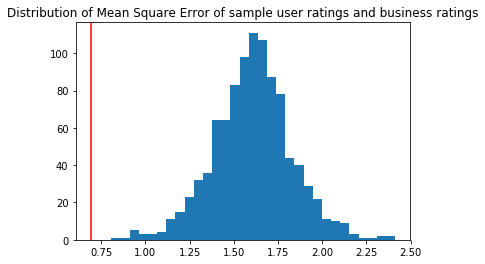

In [93]:
plt.hist(sample_rating_MSE, bins='auto')  # arguments are passed to np.histogram
plt.title("Distribution of Mean Square Error of sample user ratings and business ratings")
plt.axvline(x=elite_rating_MSE, color='red')
plt.show()

From the graph we can see that the ratings from elite users have great preditive power in predicting the actual bussiness rating. We can then deduce that the comments from those users can be very informative for business owners.

In [151]:
## This time we randomly draw same numeber of reviews as in elite user reviews
num_review = len(elite_review_df)
print(num_review)

12584


In [153]:
## Instead of elite users, we radomly draw 100 users and compute MSE (1000 draws)
sample_rating_MSE_2 = [0] * 1000
for i in range(1000):
    sample_review_df = review_df.iloc[np.random.choice(len(review_df), num_review, replace=False)]
    sample_review_df = pd.merge(sample_review_df, business_rating_df, on='dummy_business_id', how='left')
    sample_rating_MSE_2[i] = mean_squared_error(sample_review_df['business_stars'], sample_review_df['stars'])

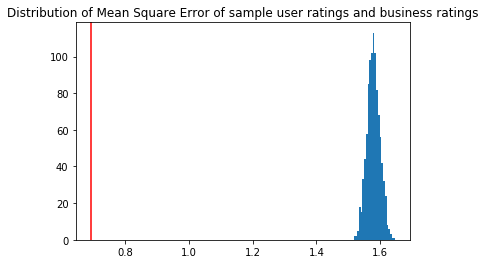

In [154]:
plt.hist(sample_rating_MSE_2, bins='auto')  # arguments are passed to np.histogram
plt.title("Distribution of Mean Square Error of sample user ratings and business ratings")
plt.axvline(x=elite_rating_MSE, color='red')
plt.show()

#### We want to know if the existence of parking lot has impact on rating of a business

In [130]:
parking_flag = [False] * len(business_df)
for i in range(len(business_df)):
    try:
        if 'true' in business_df['attributes'].iloc[i]['BusinessParking'].lower():
            parking_flag[i] = True
    except (KeyError, TypeError):
        continue

In [140]:
business_df['has_parking'] = parking_flag
business_with_parking = business_df[business_df['has_parking'] == True]
business_without_parking = business_df[business_df['has_parking'] == False]

In [139]:
print("Around {0:.2%} of businesses has parking available".format(len(business_with_parking) / len(business_df)))

Around 32.01% of businesses has parking available


In [146]:
print(business_with_parking['stars'].mean())
print(business_without_parking['stars'].mean())

3.7284684833926947
3.5859250709673396


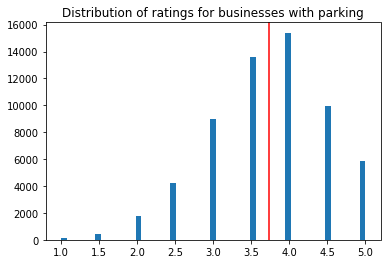

In [144]:
plt.hist(business_with_parking['stars'], bins='auto')  # arguments are passed to np.histogram
plt.title("Distribution of ratings for businesses with parking")
plt.axvline(x=business_with_parking['stars'].mean(), color='red')
plt.show()

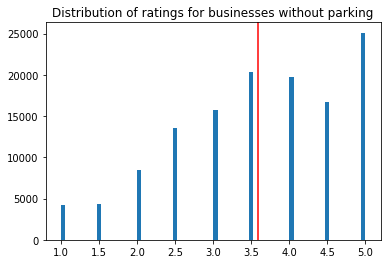

In [148]:
plt.hist(business_without_parking['stars'], bins='auto')  # arguments are passed to np.histogram
plt.title("Distribution of ratings for businesses without parking")
plt.axvline(x=business_without_parking['stars'].mean(), color='red')
plt.show()

We can see that businesses with parking lots available has slightly higher average ratings than those without parking lots. We can also see from the histogram that ratings for businesses with parking lots have lower variance.